<a href="https://colab.research.google.com/github/gamodilac/roboticHW/blob/main/tempControl_FL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [11]:
#Input
set_point = ctrl.Antecedent(np.arange(15, 40.1, 0.5), 'set_point')
sensor_temp = ctrl.Antecedent(np.arange(-3, 60.1, 0.5), 'sensor_temp')
#Output
PWM = ctrl.Consequent(np.arange(0, 100.1, 0.5), 'PWM')

#Tao bien bien doi
#Set_point
set_point['low'] = fuzz.trimf(set_point.universe,[15,15,20])
set_point['mid-low'] = fuzz.trimf(set_point.universe,[18,22.5,25])
set_point['medium'] = fuzz.trimf(set_point.universe,[23,27.5,30])
set_point['med-high'] = fuzz.trimf(set_point.universe,[28,32.5,35])
set_point['high'] = fuzz.trimf(set_point.universe,[33,37.5,40])

sensor_temp['low'] = fuzz.trimf(sensor_temp.universe,[-3,-3,31.5])
sensor_temp['mid-low'] = fuzz.trimf(sensor_temp.universe,[-3,15.5,31.5])
sensor_temp['medium'] = fuzz.trimf(sensor_temp.universe,[15.5,31.5,47])
sensor_temp['med-high'] = fuzz.trimf(sensor_temp.universe,[31.5,47,60])
sensor_temp['high'] = fuzz.trimf(sensor_temp.universe,[31.5,60,60])

PWM['low power'] = fuzz.trimf(PWM.universe,[0,0,50])
PWM['mid-low power'] = fuzz.trimf(PWM.universe,[0,25,50])
PWM['medium power'] = fuzz.trimf(PWM.universe,[25,50,75])
PWM['med-high power'] = fuzz.trimf(PWM.universe,[50,75,100])
PWM['high power'] = fuzz.trimf(PWM.universe,[50,100,100])



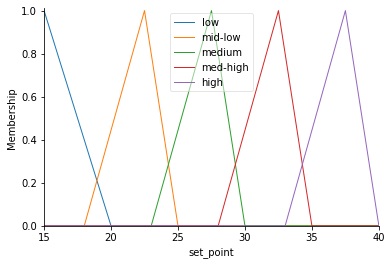

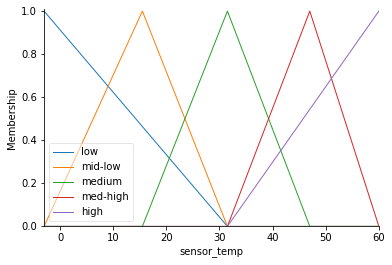

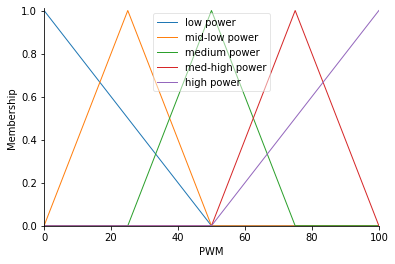

In [12]:
set_point.view()
sensor_temp.view()
PWM.view()

In [14]:
rule_1 = ctrl.Rule(set_point['low']&sensor_temp['low'],PWM['low power'])
rule_2 = ctrl.Rule(set_point['low']&sensor_temp['mid-low'],PWM['mid-low power'])
rule_3 = ctrl.Rule(set_point['low']&sensor_temp['medium'],PWM['medium power'])
rule_4 = ctrl.Rule(set_point['low']&sensor_temp['med-high'],PWM['med-high power'])
rule_5 = ctrl.Rule(set_point['low']&sensor_temp['high'],PWM['high power'])

rule_6 = ctrl.Rule(set_point['mid-low']&sensor_temp['low'],PWM['low power'])
rule_7 = ctrl.Rule(set_point['mid-low']&sensor_temp['mid-low'],PWM['low power'])
rule_8 = ctrl.Rule(set_point['mid-low']&sensor_temp['medium'],PWM['medium power'])
rule_9 = ctrl.Rule(set_point['mid-low']&sensor_temp['med-high'],PWM['med-high power'])
rule_10 = ctrl.Rule(set_point['mid-low']&sensor_temp['high'],PWM['high power'])

rule_11 = ctrl.Rule(set_point['medium']&sensor_temp['low'],PWM['low power'])
rule_12 = ctrl.Rule(set_point['medium']&sensor_temp['mid-low'],PWM['low power'])
rule_13 = ctrl.Rule(set_point['medium']&sensor_temp['medium'],PWM['low power'])
rule_14 = ctrl.Rule(set_point['medium']&sensor_temp['med-high'],PWM['mid-low power'])
rule_15 = ctrl.Rule(set_point['medium']&sensor_temp['high'],PWM['medium power'])

rule_16 = ctrl.Rule(set_point['med-high']&sensor_temp['low'],PWM['low power'])
rule_17 = ctrl.Rule(set_point['med-high']&sensor_temp['mid-low'],PWM['low power'])
rule_18 = ctrl.Rule(set_point['med-high']&sensor_temp['medium'],PWM['low power'])
rule_19 = ctrl.Rule(set_point['med-high']&sensor_temp['med-high'],PWM['low power'])
rule_20 = ctrl.Rule(set_point['med-high']&sensor_temp['high'],PWM['mid-low power'])

rule_21 = ctrl.Rule(set_point['high']&sensor_temp['low'],PWM['low power'])
rule_22 = ctrl.Rule(set_point['high']&sensor_temp['mid-low'],PWM['low power'])
rule_23 = ctrl.Rule(set_point['high']&sensor_temp['medium'],PWM['low power'])
rule_24 = ctrl.Rule(set_point['high']&sensor_temp['med-high'],PWM['low power'])
rule_25 = ctrl.Rule(set_point['high']&sensor_temp['high'],PWM['low power'])



46.66338947351962


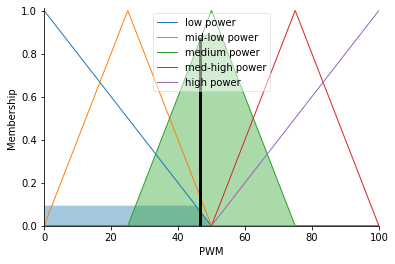

In [16]:
powering_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['set_point'] =  22          #15~35
powering.input['sensor_temp'] = 30       #-3~60
powering.compute()
print(powering.output['PWM'])
PWM.view(sim = powering)